In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
import pickle

# Shap analysis - feature importance plus "clustering"

In [2]:
datafile = "Dataset_15_feat.xlsx"

df = pd.read_excel(datafile)

with open('Trained_models/15_feat_LGBM_model.pkl', 'rb') as file:  
    LGBM_model = pickle.load(file)

X = df.drop(['Experimental_index','DP_Group','Release'],axis='columns')
Y = df['Release']
G = df['DP_Group']

# LGBM Model - Feature dependence with SHAP

In [12]:
len(df)

3783

In [3]:
# feature importance for entire training dataset - using shap

stdScale = StandardScaler().fit(X)
X_scale=stdScale.transform(X)

explainer = shap.TreeExplainer(LGBM_model)

shap_values = explainer.shap_values(X_scale) ## SHAP values for entire dataset


# LGBM Model - PCA using SHAP values

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

shap_pca50 = PCA(n_components=15).fit_transform(shap_values)
shap_embedded = TSNE(n_components=2, perplexity=50, random_state = 0).fit_transform(shap_values)

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


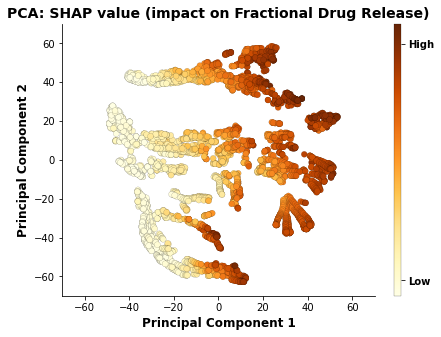

In [11]:
f = plt.figure(figsize=(7,5))
plt.scatter(shap_embedded[:,0],
           shap_embedded[:,1],
           c=shap_values.sum(1).astype(np.float64),
           linewidth=0.1, alpha=1.0, edgecolor='black', cmap='YlOrBr')

cb = plt.colorbar(label= None, aspect=40, orientation="vertical")
cb.set_alpha(1)
cb.draw_all()
#cb.outline.set_color('black')
cb.outline.set_linewidth(0.2)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
cb.set_ticks([-0.4,  0.5])
cb.set_ticklabels(['Low', 'High'])
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=10, color="black", weight="bold")


#plt.gca().axis("off") # with axis
plt.gca().axis("on") # no axis

# Title
plt.gca().axes.set_title("PCA: SHAP value (impact on Fractional Drug Release)", fontsize=14, color="black", weight="bold")

# Title - x-axis/y-axis
plt.gca().set_xlabel("Principal Component 1", fontsize=12, color='black', weight="bold")
plt.gca().set_ylabel("Principal Component 2", fontsize=12, color='black', weight="bold")

# y-axis limits and interval
plt.gca().set(ylim=(-70, 70), yticks=np.arange(-60, 65, 20))
plt.gca().set(xlim=(-70, 70), xticks=np.arange(-60, 65, 20))

# x-axis and y-axis tick color
plt.gca().tick_params(colors='black', which='both')  # 'both' refers to minor and major axes

# format graph outline (color)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.savefig('Figures/Figure_6/PCA_analysis_all.png', dpi=600, format = 'png', transparent=False)

#plt.show()

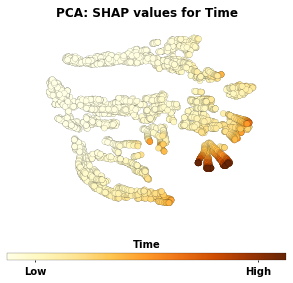

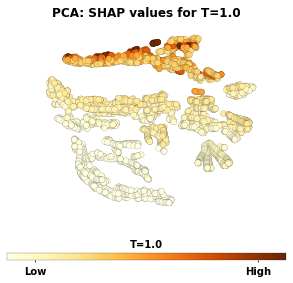

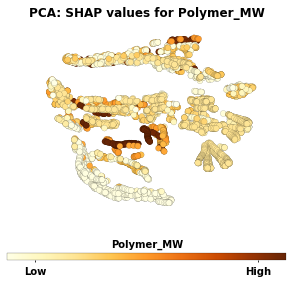

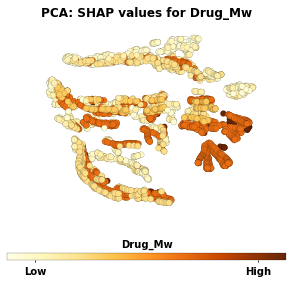

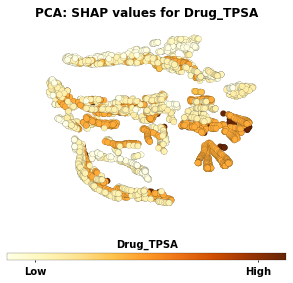

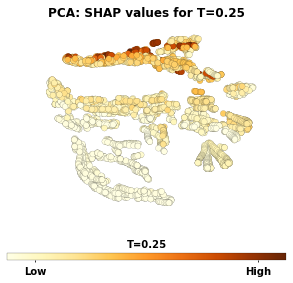

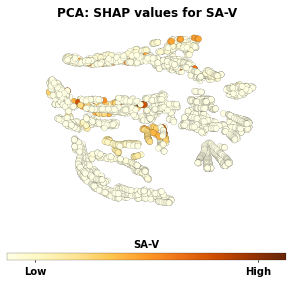

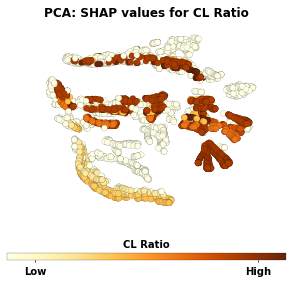

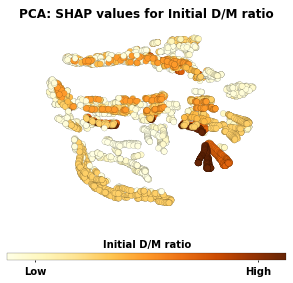

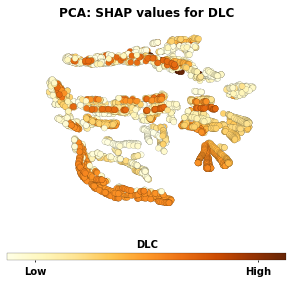

In [12]:
for feature in ["Time", "T=1.0", "Polymer_MW", "Drug_Mw", "Drug_TPSA", 
                "T=0.25", "SA-V", "CL Ratio", "Initial D/M ratio", "DLC"]:
    
    norm_feature = (X[feature]-X[feature].min())/(X[feature].max()-X[feature].min())
    
    f = plt.figure(figsize=(5,5))
    plt.scatter(shap_embedded[:,0],
               shap_embedded[:,1],
               c=norm_feature,
               linewidth=0.1, alpha=1.0, edgecolor='black', cmap='YlOrBr')
    
    cb = plt.colorbar(label=None, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0.2)
    cb.ax.tick_params('x', length=2)
    cb.ax.xaxis.set_label_position('top')
    cb.ax.get_title()
    cb.ax.set_title(label=feature, fontsize=10, color="black", weight="bold")
    cb.set_ticks([0.1, 0.9])
    cb.set_ticklabels(['Low', 'High'])
    cb.ax.set_xticklabels(cb.ax.get_xticklabels(), fontsize=10, color="black", weight="bold")

    plt.gca().axis("off") # with axis
    #plt.gca().axis("on") # no axis

    # Title
    plt.gca().axes.set_title("PCA: SHAP values for "+str(feature), 
                             fontsize=12, color="black", weight="bold")
    # y-axis limits and interval
    plt.gca().set(ylim=(-70, 70), yticks=np.arange(-60, 65, 20))
    plt.gca().set(xlim=(-70, 70), xticks=np.arange(-60, 65, 20))

    #plt.tight_layout()
    
    filename = feature.replace("/"," ") # remove "/" from string name
    
    plt.savefig('Figures/Figure_6/PCA_analysis_with_'+str(filename)+'_highlighted.png', dpi=600, format = 'png', transparent=False)
    
    #plt.show()